In [155]:
from google.colab import drive
drive.mount('/content/drive')
%cd 'drive/MyDrive/Colab Notebooks/WRI-Hackathon/python_scripts/dataset'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/WRI-Hackathon/python_scripts/dataset'
/content/drive/MyDrive/Colab Notebooks/WRI-Hackathon/python_scripts/dataset


In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read datasets

In [157]:
df = pd.read_csv('reservoir_dataset.csv')
df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY
0,2011-01-01,Hemavathi,31.60,2916.07,981.0,2001.0,2011,1,1,0
1,2012-01-01,Hemavathi,12.48,2886.90,111.0,4488.0,2012,1,1,0
2,2014-01-01,Hemavathi,11.64,2884.84,125.0,3225.0,2014,1,1,0
3,2015-01-01,Hemavathi,24.04,2906.38,104.0,4325.0,2015,1,1,0
4,2016-01-01,Hemavathi,6.23,2869.10,163.0,125.0,2016,1,1,0
...,...,...,...,...,...,...,...,...,...,...
13237,2020-02-29,Harangi,3.54,2834,40.0,40.0,2020,2,29,365
13238,2016-02-29,Kabini,8.35,2262.62,118.0,1000.0,2016,2,29,365
13239,2020-02-29,Kabini,15.48,2277.20,112.0,1700.0,2020,2,29,365
13240,2016-02-29,K.R.S,17.98,93.27,370.0,584.0,2016,2,29,365


In [158]:
rainfall_df = pd.read_csv('Rainfall 2010-2020/rainfall_departure_dataset.csv')
rainfall_df

,DISTRICTS,RAINFALL,YEAR,MONTH,DEPARTURE,SEASON
0,BAGALKOTE,0.0,2008,1,-100.0,WINTER
1,BELLARY,0.0,2008,1,-100.0,WINTER
2,KOLAR,0.0,2008,1,-100.0,WINTER
3,GULBARGA,0.0,2008,1,-100.0,WINTER
4,BANGALORE URBAN,0.1,2008,1,-88.0,WINTER
...,...,...,...,...,...,...
3999,MYSURU,18.0,2019,12,54.0,WINTER
4000,MYSURU,14.7,2020,12,25.0,WINTER
4001,HASSAN,16.4,2020,12,89.0,WINTER
4002,KODAGU,9.9,2020,12,-50.0,WINTER


In [159]:
rainfall_df['DISTRICTS'].unique()

array(['BAGALKOTE', 'BELLARY', 'KOLAR', 'GULBARGA', 'BANGALORE URBAN',
       'CHIKKAMAGALURU', 'CHAMARAJANAGAR', 'KODAGU', 'DAKSHIN KANNADA',
       'KOPPAL', 'CHITRADURGA', 'HAVERI', 'MYSURU', 'MANDYA', 'BIDAR',
       'UDUPI', 'BIJAPUR', 'DHARWAD', 'DAVANGERE', 'BELGAUM', 'TUMKUR',
       'SHIMOGA', 'BANGALORE RURAL', 'RAICHUR', 'HASSAN', 'UTTAR KANNADA',
       'GADAG', 'RAMANAGARA', 'YADGIR', 'CHIKBALLAPURA', 'BELAGAVI',
       'VIJAYAPURA', 'KALABURGI'], dtype=object)

In [160]:
rainfall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4004 entries, 0 to 4003
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DISTRICTS  4004 non-null   object 
 1   RAINFALL   4004 non-null   float64
 2   YEAR       4004 non-null   int64  
 3   MONTH      4004 non-null   int64  
 4   DEPARTURE  4004 non-null   float64
 5   SEASON     4004 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 187.8+ KB


In [161]:
kodagu_df = rainfall_df[rainfall_df['DISTRICTS'] == 'KODAGU']
kodagu_df.sort_values(by=['YEAR', 'MONTH'])
kodagu_df = kodagu_df[kodagu_df['YEAR'] < 2019]
kodagu_df

,DISTRICTS,RAINFALL,YEAR,MONTH,DEPARTURE,SEASON
7,KODAGU,0.0,2008,1,-100.0,WINTER
47,KODAGU,0.0,2009,1,-100.0,WINTER
72,KODAGU,12.4,2010,1,188.0,WINTER
105,KODAGU,0.7,2011,1,-80.0,WINTER
126,KODAGU,0.5,2012,1,-86.0,WINTER
...,...,...,...,...,...,...
3867,KODAGU,24.7,2014,12,41.0,WINTER
3875,KODAGU,10.7,2015,12,-39.0,WINTER
3906,KODAGU,49.9,2016,12,185.0,WINTER
3939,KODAGU,23.8,2017,12,36.0,WINTER


In [162]:
hassan_df = rainfall_df[rainfall_df['DISTRICTS'] == 'HASSAN']
hassan_df.sort_values(by=['YEAR', 'MONTH'])
hassan_df = hassan_df[hassan_df['YEAR'] < 2019]
hassan_df

,DISTRICTS,RAINFALL,YEAR,MONTH,DEPARTURE,SEASON
24,HASSAN,0.0,2008,1,-100.0,WINTER
29,HASSAN,0.0,2009,1,-100.0,WINTER
64,HASSAN,16.6,2010,1,655.0,WINTER
99,HASSAN,0.0,2011,1,-100.0,WINTER
139,HASSAN,0.0,2012,1,-100.0,WINTER
...,...,...,...,...,...,...
3856,HASSAN,15.4,2014,12,41.0,WINTER
3899,HASSAN,6.0,2015,12,-45.0,WINTER
3924,HASSAN,30.9,2016,12,184.0,WINTER
3945,HASSAN,8.9,2017,12,-18.0,WINTER


In [163]:
mysuru_df = rainfall_df[rainfall_df['DISTRICTS'] == 'MYSURU']
mysuru_df.sort_values(by=['YEAR', 'MONTH'])
mysuru_df = mysuru_df[mysuru_df['YEAR'] < 2019]
mysuru_df

,DISTRICTS,RAINFALL,YEAR,MONTH,DEPARTURE,SEASON
12,MYSURU,0.0,2008,1,-100.0,WINTER
45,MYSURU,0.0,2009,1,-100.0,WINTER
60,MYSURU,0.0,2010,1,-100.0,WINTER
90,MYSURU,0.6,2011,1,-76.0,WINTER
118,MYSURU,0.7,2012,1,-72.0,WINTER
...,...,...,...,...,...,...
3850,MYSURU,28.6,2014,12,118.0,WINTER
3900,MYSURU,9.0,2015,12,-31.0,WINTER
3911,MYSURU,31.0,2016,12,137.0,WINTER
3955,MYSURU,29.4,2017,12,124.0,WINTER


In [164]:
mandya_df = rainfall_df[rainfall_df['DISTRICTS'] == 'MANDYA']
mandya_df.sort_values(by=['YEAR', 'MONTH'])
mandya_df

,DISTRICTS,RAINFALL,YEAR,MONTH,DEPARTURE,SEASON
13,MANDYA,0.0,2008,1,-100.0,WINTER
51,MANDYA,0.0,2009,1,-100.0,WINTER
56,MANDYA,7.0,2010,1,233.0,WINTER
96,MANDYA,0.0,2011,1,-100.0,WINTER
113,MANDYA,0.2,2012,1,-89.0,WINTER
...,...,...,...,...,...,...
3869,MANDYA,22.0,2014,12,57.0,WINTER
3885,MANDYA,4.9,2015,12,-65.0,WINTER
3921,MANDYA,44.3,2016,12,217.0,WINTER
3952,MANDYA,16.2,2017,12,16.0,WINTER


kodagu_df['RAINFALL'].values<br>
mysuru_df['RAINFALL'].values<br>
 hassan_df['RAINFALL'].values<br>
 mandya_df['RAINFALL'].values

In [165]:
krs_rain_df = pd.DataFrame({'RAINFALL': kodagu_df['RAINFALL'].values + mysuru_df['RAINFALL'].values + mandya_df['RAINFALL'].values,
                                  'YEAR': hassan_df['YEAR'].values,
                                  'MONTH': hassan_df['MONTH'].values,
                                  'SEASON': kodagu_df['SEASON']})
krs_rain_df

,RAINFALL,YEAR,MONTH,SEASON
7,0.0,2008,1,WINTER
47,0.0,2009,1,WINTER
72,19.4,2010,1,WINTER
105,1.3,2011,1,WINTER
126,1.4,2012,1,WINTER
...,...,...,...,...
3867,75.3,2014,12,WINTER
3875,24.6,2015,12,WINTER
3906,125.2,2016,12,WINTER
3939,69.4,2017,12,WINTER


In [166]:
krs_df = df[df['RESERVOIR'] == 'K.R.S']
krs_df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY
27,2011-01-01,K.R.S,46.42,122.59,2029.0,2000.0,2011,1,1,0
28,2012-01-01,K.R.S,40.97,118.33,4924.0,2488.0,2012,1,1,0
29,2014-01-01,K.R.S,38.58,116.33,1885.0,1994.0,2014,1,1,0
30,2015-01-01,K.R.S,43.26,120.17,1631.0,4419.0,2015,1,1,0
31,2016-01-01,K.R.S,27.89,106,703.0,1965.0,2016,1,1,0
...,...,...,...,...,...,...,...,...,...,...
13231,2017-12-31,K.R.S,25.83,103.68,273.0,4749.0,2017,12,31,364
13232,2018-12-31,K.R.S,36.61,114.60,453.0,686.0,2018,12,31,364
13233,2019-12-31,K.R.S,45.16,121.60,1843.0,1208.0,2019,12,31,364
13240,2016-02-29,K.R.S,17.98,93.27,370.0,584.0,2016,2,29,365


In [167]:
krs_df = krs_df.merge(krs_rain_df, on=['YEAR', 'MONTH'])
krs_df = krs_df.sort_values(['YEAR', 'MONTH']).reset_index(drop=True)
krs_df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,SEASON
0,2011-01-01,K.R.S,46.42,122.59,2029.0,2000.0,2011,1,1,0,1.3,WINTER
1,2011-01-02,K.R.S,46.54,122.68,3084.0,1490.0,2011,1,2,1,1.3,WINTER
2,2011-01-03,K.R.S,46.64,122.75,2776.0,1491.0,2011,1,3,2,1.3,WINTER
3,2011-01-04,K.R.S,46.69,122.79,2311.0,1491.0,2011,1,4,3,1.3,WINTER
4,2011-01-05,K.R.S,46.70,122.80,1847.0,1491.0,2011,1,5,4,1.3,WINTER
...,...,...,...,...,...,...,...,...,...,...,...,...
2608,2018-12-27,K.R.S,36.79,114.76,1050.0,1542.0,2018,12,27,360,12.1,WINTER
2609,2018-12-28,K.R.S,36.72,114.70,921.0,1542.0,2018,12,28,361,12.1,WINTER
2610,2018-12-29,K.R.S,36.66,114.65,622.0,1114.0,2018,12,29,362,12.1,WINTER
2611,2018-12-30,K.R.S,36.64,114.63,582.0,686.0,2018,12,30,363,12.1,WINTER


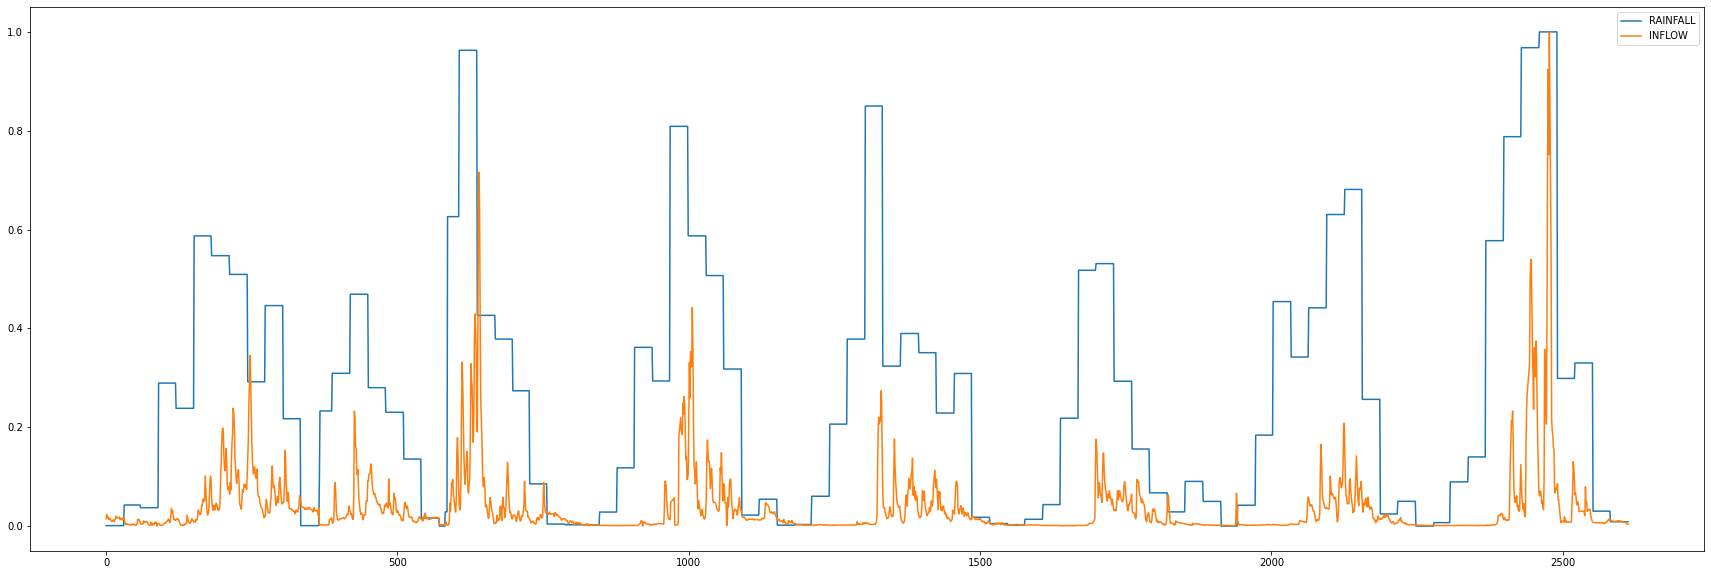

In [168]:
plt.figure(figsize=(30, 10))
plt.plot(krs_df['RAINFALL'] / krs_df['RAINFALL'].max(), label='RAINFALL')
plt.plot(krs_df['INFLOW_CUSECS'] / krs_df['INFLOW_CUSECS'].max(), label='INFLOW')
plt.legend()
plt.show()

### Add segments to rainfall data

In [8]:
df['DATE'].max(), df['DATE'].min()

(31, 1)

In [9]:
df['MONTH'].max(), df['MONTH'].min()

(12, 1)

In [10]:
months_list = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
month_monsoon = {'JAN': 'WINTER', 'FEB': 'WINTER', 'MAR': 'SUMMER', 'APR': 'SUMMER',
                 'MAY': 'SUMMER', 'JUN': 'SUMMER', 'JUL': 'MONSOON', 'AUG': 'MONSOON',
                 'SEP': 'MONSOON', 'OCT': 'WINTER', 'NOV': 'WINTER', 'DEC': 'WINTER'}
mod_rainfall_df = []
for idx, row in rainfall_df.iterrows():
    district = row['DISTRICTS']
    year = row['YEAR']

    leap_year = False
    if year % 4 == 0:
        leap_year = True
    
    district = row['DISTRICTS']

    for mon in months_list:
        month_data = row[mon]
        month_number = months_list.index(mon) + 1

        if mon in ['JAN', 'MAR', 'MAY', 'JUL', 'AUG', 'OCT', 'DEC']:
            num_days = 31
        elif mon in ['APR', 'JUN', 'SEP', 'NOV']:
            num_days = 30
        elif mon == 'FEB':
            if leap_year:
                num_days = 29
            else:
                num_days = 28
        else:
            raise Exception()
        
        rain_per_day = month_data / num_days

        for i in range(1, num_days+1):
            mod_rainfall_df.append([district, round(rain_per_day, 4), month_number, i, year, month_monsoon[mon]])

mod_rainfall_df = pd.DataFrame(mod_rainfall_df, columns=['DISCTRICT', 'RAINFALL', 'MONTH', 'DATE', 'YEAR', 'SEASON'])
mod_rainfall_df

KeyError: ignored

In [ ]:
day_df = df[['MONTH', 'DATE', 'DAY']].drop_duplicates().reset_index(drop=True)
day_df

,MONTH,DATE,DAY
0,1,1,0
1,1,2,1
2,1,3,2
3,1,4,3
4,1,5,4
...,...,...,...
361,12,28,361
362,12,29,362
363,12,30,363
364,12,31,364


In [ ]:
mod_rainfall_df = mod_rainfall_df.merge(day_df, on=['MONTH', 'DATE'])
mod_rainfall_df

,DISCTRICT,RAINFALL,MONTH,DATE,YEAR,SEASON,DAY
0,BAGALKOTE,0.0000,1,1,2011,WINTER,0
1,BENGALURU RURAL,0.0000,1,1,2011,WINTER,0
2,BENGALURU URBAN,0.0000,1,1,2011,WINTER,0
3,BELAGAVI,0.0000,1,1,2011,WINTER,0
4,BELLARY,0.0000,1,1,2011,WINTER,0
...,...,...,...,...,...,...,...
100069,YADGIR,0.0000,2,29,2016,WINTER,365
100070,MYSURU,0.1483,2,29,2020,WINTER,365
100071,HASSAN,0.0000,2,29,2020,WINTER,365
100072,KODAGU,0.0000,2,29,2020,WINTER,365


### Catchment District Rainfall Dataframe

Harangi -> KODAGU<br>
Hemavathi -> HASSAN, CHIKKAMAGALURU<br>
KRS -> KODAGU<br>
KABINI -> KODAGU

In [ ]:
kodagu_df = mod_rainfall_df[mod_rainfall_df['DISCTRICT'] == 'KODAGU']
kodagu_df.sort_values(by=['DAY', 'YEAR'])
kodagu_df

,DISCTRICT,RAINFALL,MONTH,DATE,YEAR,SEASON,DAY
18,KODAGU,0.0226,1,1,2011,WINTER,0
48,KODAGU,0.0161,1,1,2012,WINTER,0
78,KODAGU,0.0000,1,1,2013,WINTER,0
108,KODAGU,0.1065,1,1,2014,WINTER,0
138,KODAGU,0.0065,1,1,2015,WINTER,0
...,...,...,...,...,...,...,...
99993,KODAGU,1.1194,12,31,2019,WINTER,364
100008,KODAGU,0.3194,12,31,2020,WINTER,364
100028,KODAGU,0.0759,2,29,2012,WINTER,365
100057,KODAGU,0.0276,2,29,2016,WINTER,365


In [ ]:
hassan_df = mod_rainfall_df[mod_rainfall_df['DISCTRICT'] == 'HASSAN']
hassan_df.sort_values(by=['DAY', 'YEAR'])
hassan_df

,DISCTRICT,RAINFALL,MONTH,DATE,YEAR,SEASON,DAY
16,HASSAN,0.0000,1,1,2011,WINTER,0
46,HASSAN,0.0000,1,1,2012,WINTER,0
76,HASSAN,0.0129,1,1,2013,WINTER,0
106,HASSAN,0.0000,1,1,2014,WINTER,0
136,HASSAN,0.0290,1,1,2015,WINTER,0
...,...,...,...,...,...,...,...
99990,HASSAN,0.8129,12,31,2019,WINTER,364
100007,HASSAN,0.5290,12,31,2020,WINTER,364
100026,HASSAN,0.0103,2,29,2012,WINTER,365
100054,HASSAN,0.0586,2,29,2016,WINTER,365


In [ ]:
chikkamagaluru_df = mod_rainfall_df[mod_rainfall_df['DISCTRICT'] == 'CHIKKAMAGALURU']
chikkamagaluru_df.sort_values(by=['DAY', 'YEAR'])
chikkamagaluru_df

,DISCTRICT,RAINFALL,MONTH,DATE,YEAR,SEASON,DAY
9,CHIKKAMAGALURU,0.0000,1,1,2011,WINTER,0
39,CHIKKAMAGALURU,0.0000,1,1,2012,WINTER,0
69,CHIKKAMAGALURU,0.0484,1,1,2013,WINTER,0
99,CHIKKAMAGALURU,0.0258,1,1,2014,WINTER,0
129,CHIKKAMAGALURU,0.0000,1,1,2015,WINTER,0
...,...,...,...,...,...,...,...
99984,CHIKKAMAGALURU,1.2355,12,31,2019,WINTER,364
100009,CHIKKAMAGALURU,0.6516,12,31,2020,WINTER,364
100019,CHIKKAMAGALURU,0.0103,2,29,2012,WINTER,365
100048,CHIKKAMAGALURU,0.0448,2,29,2016,WINTER,365


### Reservoir DataFrame with Rainfall

In [ ]:
krs_harangi_kabini_rain_df = pd.DataFrame({'RAINFALL': kodagu_df['RAINFALL'].values,
                                           'YEAR': kodagu_df['YEAR'].values,
                                           'DAY': kodagu_df['DAY'].values,
                                           'SEASON': kodagu_df['SEASON']})
krs_harangi_kabini_rain_df

,RAINFALL,YEAR,DAY,SEASON
18,0.0226,2011,0,WINTER
48,0.0161,2012,0,WINTER
78,0.0000,2013,0,WINTER
108,0.1065,2014,0,WINTER
138,0.0065,2015,0,WINTER
...,...,...,...,...
99993,1.1194,2019,364,WINTER
100008,0.3194,2020,364,WINTER
100028,0.0759,2012,365,WINTER
100057,0.0276,2016,365,WINTER


In [ ]:
hemavathi_rain_df = pd.DataFrame({'RAINFALL': hassan_df['RAINFALL'].values + chikkamagaluru_df['RAINFALL'].values,
                                  'YEAR': hassan_df['YEAR'].values,
                                  'DAY': hassan_df['DAY'].values,
                                  'SEASON': kodagu_df['SEASON']})
hemavathi_rain_df

,RAINFALL,YEAR,DAY,SEASON
18,0.0000,2011,0,WINTER
48,0.0000,2012,0,WINTER
78,0.0613,2013,0,WINTER
108,0.0258,2014,0,WINTER
138,0.0290,2015,0,WINTER
...,...,...,...,...
99993,2.0484,2019,364,WINTER
100008,1.1806,2020,364,WINTER
100028,0.0206,2012,365,WINTER
100057,0.1034,2016,365,WINTER


In [ ]:
krs_df = df[df['RESERVOIR'] == 'K.R.S'].sort_values(by=['DAY', 'YEAR'])
krs_df = krs_df.merge(krs_harangi_kabini_rain_df, how='left', on=['DAY', 'YEAR'])
krs_df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,SEASON
0,2011-01-01,K.R.S,46.42,122.59,2029.0,2000.0,2011,1,1,0,0.0226,WINTER
1,2012-01-01,K.R.S,40.97,118.33,4924.0,2488.0,2012,1,1,0,0.0161,WINTER
2,2014-01-01,K.R.S,38.58,116.33,1885.0,1994.0,2014,1,1,0,0.1065,WINTER
3,2015-01-01,K.R.S,43.26,120.17,1631.0,4419.0,2015,1,1,0,0.0065,WINTER
4,2016-01-01,K.R.S,27.89,106,703.0,1965.0,2016,1,1,0,0.0097,WINTER
...,...,...,...,...,...,...,...,...,...,...,...,...
3303,2017-12-31,K.R.S,25.83,103.68,273.0,4749.0,2017,12,31,364,0.7677,WINTER
3304,2018-12-31,K.R.S,36.61,114.60,453.0,686.0,2018,12,31,364,0.2645,WINTER
3305,2019-12-31,K.R.S,45.16,121.60,1843.0,1208.0,2019,12,31,364,1.1194,WINTER
3306,2016-02-29,K.R.S,17.98,93.27,370.0,584.0,2016,2,29,365,0.0276,WINTER


In [ ]:
kabini_df = df[df['RESERVOIR'] == 'Kabini'].sort_values(by=['DAY', 'YEAR'])
kabini_df = kabini_df.merge(krs_harangi_kabini_rain_df, how='left', on=['DAY', 'YEAR'])
kabini_df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,SEASON
0,2011-01-01,Kabini,16.04,2278.22,570.0,50.0,2011,1,1,0,0.0226,WINTER
1,2012-01-01,Kabini,11.71,2270.06,520.0,50.0,2012,1,1,0,0.0161,WINTER
2,2014-01-01,Kabini,14.42,2275.26,306.0,50.0,2014,1,1,0,0.1065,WINTER
3,2015-01-01,Kabini,13.73,2273.98,287.0,1900.0,2015,1,1,0,0.0065,WINTER
4,2016-01-01,Kabini,9.55,2265.40,409.0,200.0,2016,1,1,0,0.0097,WINTER
...,...,...,...,...,...,...,...,...,...,...,...,...
3304,2017-12-31,Kabini,13.92,2274.34,130.0,500.0,2017,12,31,364,0.7677,WINTER
3305,2018-12-31,Kabini,15.09,2276.50,194.0,0.0,2018,12,31,364,0.2645,WINTER
3306,2019-12-31,Kabini,15.28,2276.85,372.0,50.0,2019,12,31,364,1.1194,WINTER
3307,2016-02-29,Kabini,8.35,2262.62,118.0,1000.0,2016,2,29,365,0.0276,WINTER


In [ ]:
harangi_df = df[df['RESERVOIR'] == 'Harangi'].sort_values(by=['DAY', 'YEAR'])
harangi_df = harangi_df.merge(krs_harangi_kabini_rain_df, how='left', on=['DAY', 'YEAR'])
harangi_df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,SEASON
0,2011-01-01,Harangi,3.74,2835.90,142.0,0.0,2011,1,1,0,0.0226,WINTER
1,2012-01-01,Harangi,1.76,2808.74,66.0,630.0,2012,1,1,0,0.0161,WINTER
2,2014-01-01,Harangi,1.26,2800.40,9.0,40.0,2014,1,1,0,0.1065,WINTER
3,2015-01-01,Harangi,3.11,2825.55,956.0,1600.0,2015,1,1,0,0.0065,WINTER
4,2016-01-01,Harangi,0.68,2786.72,87.0,0.0,2016,1,1,0,0.0097,WINTER
...,...,...,...,...,...,...,...,...,...,...,...,...
3311,2017-12-31,Harangi,2.56,2818.72,163.0,70.0,2017,12,31,364,0.7677,WINTER
3312,2018-12-31,Harangi,1.64,2806.89,97.0,15.0,2018,12,31,364,0.2645,WINTER
3313,2019-12-31,Harangi,3.43,2831.70,140.0,50.0,2019,12,31,364,1.1194,WINTER
3314,2016-02-29,Harangi,0.99,2794.94,38.0,0.0,2016,2,29,365,0.0276,WINTER


In [ ]:
hemavathi_df = df[df['RESERVOIR'] == 'Hemavathi'].sort_values(by=['DAY', 'YEAR'])
hemavathi_df = hemavathi_df.merge(hemavathi_rain_df, how='left', on=['DAY', 'YEAR'])
hemavathi_df.drop_duplicates(inplace=True)
hemavathi_df

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,SEASON
0,2011-01-01,Hemavathi,31.60,2916.07,981.0,2001.0,2011,1,1,0,0.0000,WINTER
1,2012-01-01,Hemavathi,12.48,2886.90,111.0,4488.0,2012,1,1,0,0.0000,WINTER
2,2014-01-01,Hemavathi,11.64,2884.84,125.0,3225.0,2014,1,1,0,0.0258,WINTER
3,2015-01-01,Hemavathi,24.04,2906.38,104.0,4325.0,2015,1,1,0,0.0290,WINTER
4,2016-01-01,Hemavathi,6.23,2869.10,163.0,125.0,2016,1,1,0,0.0581,WINTER
...,...,...,...,...,...,...,...,...,...,...,...,...
3304,2017-12-31,Hemavathi,8.51,2877.05,174.0,175.0,2017,12,31,364,0.3097,WINTER
3305,2018-12-31,Hemavathi,9.83,2880.40,0.0,2100.0,2018,12,31,364,0.3000,WINTER
3306,2019-12-31,Hemavathi,20.34,2901,547.0,2950.0,2019,12,31,364,2.0484,WINTER
3307,2016-02-29,Hemavathi,5.77,2867.72,48.0,125.0,2016,2,29,365,0.1034,WINTER


In [ ]:
assert hemavathi_df[hemavathi_df['RAINFALL'].isna()].shape[0] == 0
assert harangi_df[harangi_df['RAINFALL'].isna()].shape[0] == 0
assert kabini_df[kabini_df['RAINFALL'].isna()].shape[0] == 0
assert krs_df[krs_df['RAINFALL'].isna()].shape[0] == 0

### Plot relative Avg. *Inflow* vs Avg. *Rainfall*

In [ ]:
def plot_inflow_rainfall(res_df):
    plt.title(res_df['RESERVOIR'].unique()[0])
    rain = np.sum([res_df[res_df['YEAR'] == year]['RAINFALL'] for year in [2015, 2017, 2018, 2019]], axis=0)
    inflow = np.sum([res_df[res_df['YEAR'] == year]['INFLOW_CUSECS'] for year in [2015, 2017, 2018, 2019]], axis=0)
    plt.plot(rain/rain.max(), label='Rainfall')
    plt.plot(inflow/inflow.max(), label='Inflow')
    plt.legend()
    plt.show()

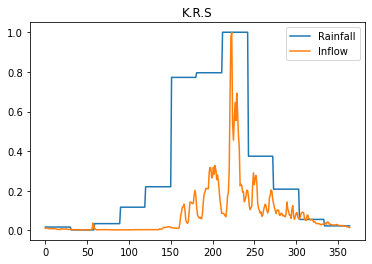

In [ ]:
plot_inflow_rainfall(krs_df)

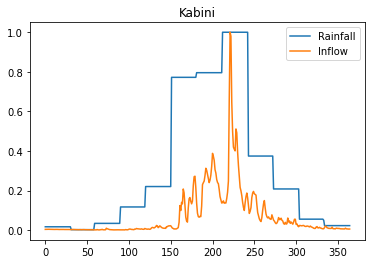

In [ ]:
plot_inflow_rainfall(kabini_df)

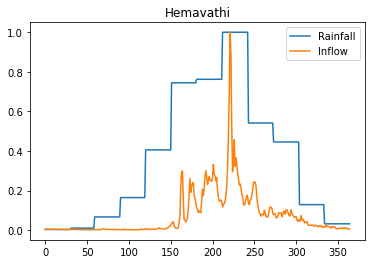

In [ ]:
plot_inflow_rainfall(hemavathi_df)

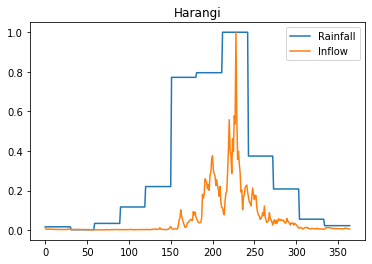

In [ ]:
plot_inflow_rainfall(harangi_df)

In [ ]:
x = krs_df[krs_df['YEAR'] == 2018].reset_index(drop=True)

In [ ]:
x['ROLL'] = x['RAINFALL'].rolling(window=25, min_periods=1, center=True).mean()

In [ ]:
x.head()

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,ROLL
0,2018-01-01,K.R.S,25.55,103.35,291.0,3445.0,2018,1,1,0,0.0,0.0
1,2018-01-02,K.R.S,25.40,103.17,231.0,1887.0,2018,1,2,1,0.0,0.0
2,2018-01-03,K.R.S,25.38,103.15,264.0,334.0,2018,1,3,2,0.0,0.0
3,2018-01-04,K.R.S,25.36,103.13,264.0,334.0,2018,1,4,3,0.0,0.0
4,2018-01-05,K.R.S,25.34,103.10,165.0,334.0,2018,1,5,4,0.0,0.0


In [ ]:
x.loc[x[(x['DATE'] <= 20) & (x['DATE'] >= 10)].index, ('ROLL')] = np.nan
x

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,ROLL
0,2018-01-01,K.R.S,25.55,103.35,291.0,3445.0,2018,1,1,0,0.0000,0.0000
1,2018-01-02,K.R.S,25.40,103.17,231.0,1887.0,2018,1,2,1,0.0000,0.0000
2,2018-01-03,K.R.S,25.38,103.15,264.0,334.0,2018,1,3,2,0.0000,0.0000
3,2018-01-04,K.R.S,25.36,103.13,264.0,334.0,2018,1,4,3,0.0000,0.0000
4,2018-01-05,K.R.S,25.34,103.10,165.0,334.0,2018,1,5,4,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,K.R.S,36.79,114.76,1050.0,1542.0,2018,12,27,360,0.2645,0.2645
361,2018-12-28,K.R.S,36.72,114.70,921.0,1542.0,2018,12,28,361,0.2645,0.2645
362,2018-12-29,K.R.S,36.66,114.65,622.0,1114.0,2018,12,29,362,0.2645,0.2645
363,2018-12-30,K.R.S,36.64,114.63,582.0,686.0,2018,12,30,363,0.2645,0.2645


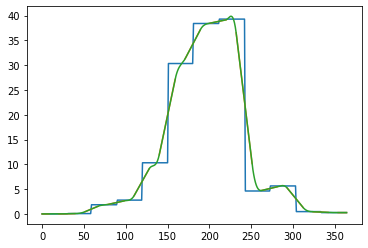

In [ ]:
plt.plot(x['RAINFALL'])
plt.plot(x['ROLL'])
plt.plot(x['ROLL'].interpolate(method='cubic'))
plt.show()

In [ ]:
x

,FLOW_DATE,RESERVOIR,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,YEAR,MONTH,DATE,DAY,RAINFALL,ROLL
0,2018-01-01,K.R.S,25.55,103.35,291.0,3445.0,2018,1,1,0,0.0000,0.0000
1,2018-01-02,K.R.S,25.40,103.17,231.0,1887.0,2018,1,2,1,0.0000,0.0000
2,2018-01-03,K.R.S,25.38,103.15,264.0,334.0,2018,1,3,2,0.0000,0.0000
3,2018-01-04,K.R.S,25.36,103.13,264.0,334.0,2018,1,4,3,0.0000,0.0000
4,2018-01-05,K.R.S,25.34,103.10,165.0,334.0,2018,1,5,4,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,K.R.S,36.79,114.76,1050.0,1542.0,2018,12,27,360,0.2645,0.2645
361,2018-12-28,K.R.S,36.72,114.70,921.0,1542.0,2018,12,28,361,0.2645,0.2645
362,2018-12-29,K.R.S,36.66,114.65,622.0,1114.0,2018,12,29,362,0.2645,0.2645
363,2018-12-30,K.R.S,36.64,114.63,582.0,686.0,2018,12,30,363,0.2645,0.2645


In [ ]:
y = x.groupby(['MONTH']).apply(lambda x: [x['RAINFALL'].sum(), x['ROLL'].sum()])

In [ ]:
(np.stack(y)[:, 0] - np.stack(y)[:, 1]).sum()

1475.6123200000118

In [ ]:
np.abs(np.stack(y)[:, 0] - np.stack(y)[:, 1]).sum()

1606.319488000005